# <font color="Red"> Homework 1</font>

------
### Information
**Name:** Ahmed Ibrahim

**Student Number:** 261032796

**Date:** 2022-01-25

**Course Number:** YCBS 258 - Practical Machine Learning

------

Create a small neural network in keras that classifies the different types of winee. They labels are the columns called "Class".

Print the history of the neural network with the loss, validation loss, accuracy and validation accuracy

## Data Mining

In [1]:
!wget https://storage.googleapis.com/nicksdemobucket/wines.csv

--2022-02-02 07:44:27--  https://storage.googleapis.com/nicksdemobucket/wines.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10957 (11K) [application/octet-stream]
Saving to: ‘wines.csv’

wines.csv           100%[===================>]  10.70K  --.-KB/s    in 0s      

2022-02-02 07:44:28 (104 MB/s) - ‘wines.csv’ saved [10957/10957]



In [2]:
# Necessary data file: 'wine.csv'.
import pandas as pd
wine_data = pd.read_csv('wines.csv')

## Data Cleaning & Exploration

In [3]:
wine_data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.tail()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [5]:
wine_data.shape

(178, 14)

In [6]:
wine_data.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [7]:
wine_data.describe(include = 'all')

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
wine_data.dtypes

Class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280-OD315_of_diluted_wines    float64
Proline                           int64
dtype: object

In [9]:
wine_data['Class'] = pd.Categorical(wine_data.Class)
wine_data.dtypes

Class                           category
Alcohol                          float64
Malic_acid                       float64
Ash                              float64
Alcalinity_of_ash                float64
Magnesium                          int64
Total_phenols                    float64
Flavanoids                       float64
Nonflavanoid_phenols             float64
Proanthocyanins                  float64
Color_intensity                  float64
Hue                              float64
OD280-OD315_of_diluted_wines     float64
Proline                            int64
dtype: object

In [10]:
wine_data.isnull().sum()

Class                           0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280-OD315_of_diluted_wines    0
Proline                         0
dtype: int64

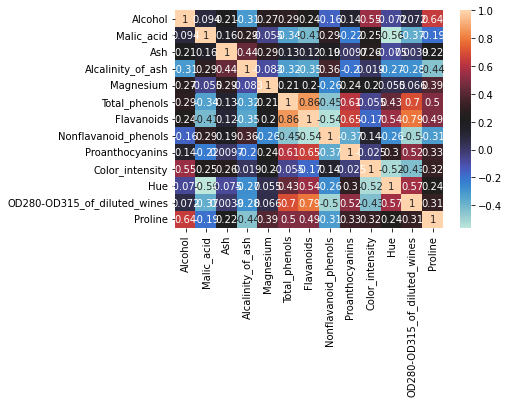

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
wine_data_corr = wine_data.corr()
sns.heatmap(wine_data_corr, 
            xticklabels = wine_data_corr.columns.values,
            yticklabels = wine_data_corr.columns.values,
            cmap='icefire',
            annot = True);
plt.show()

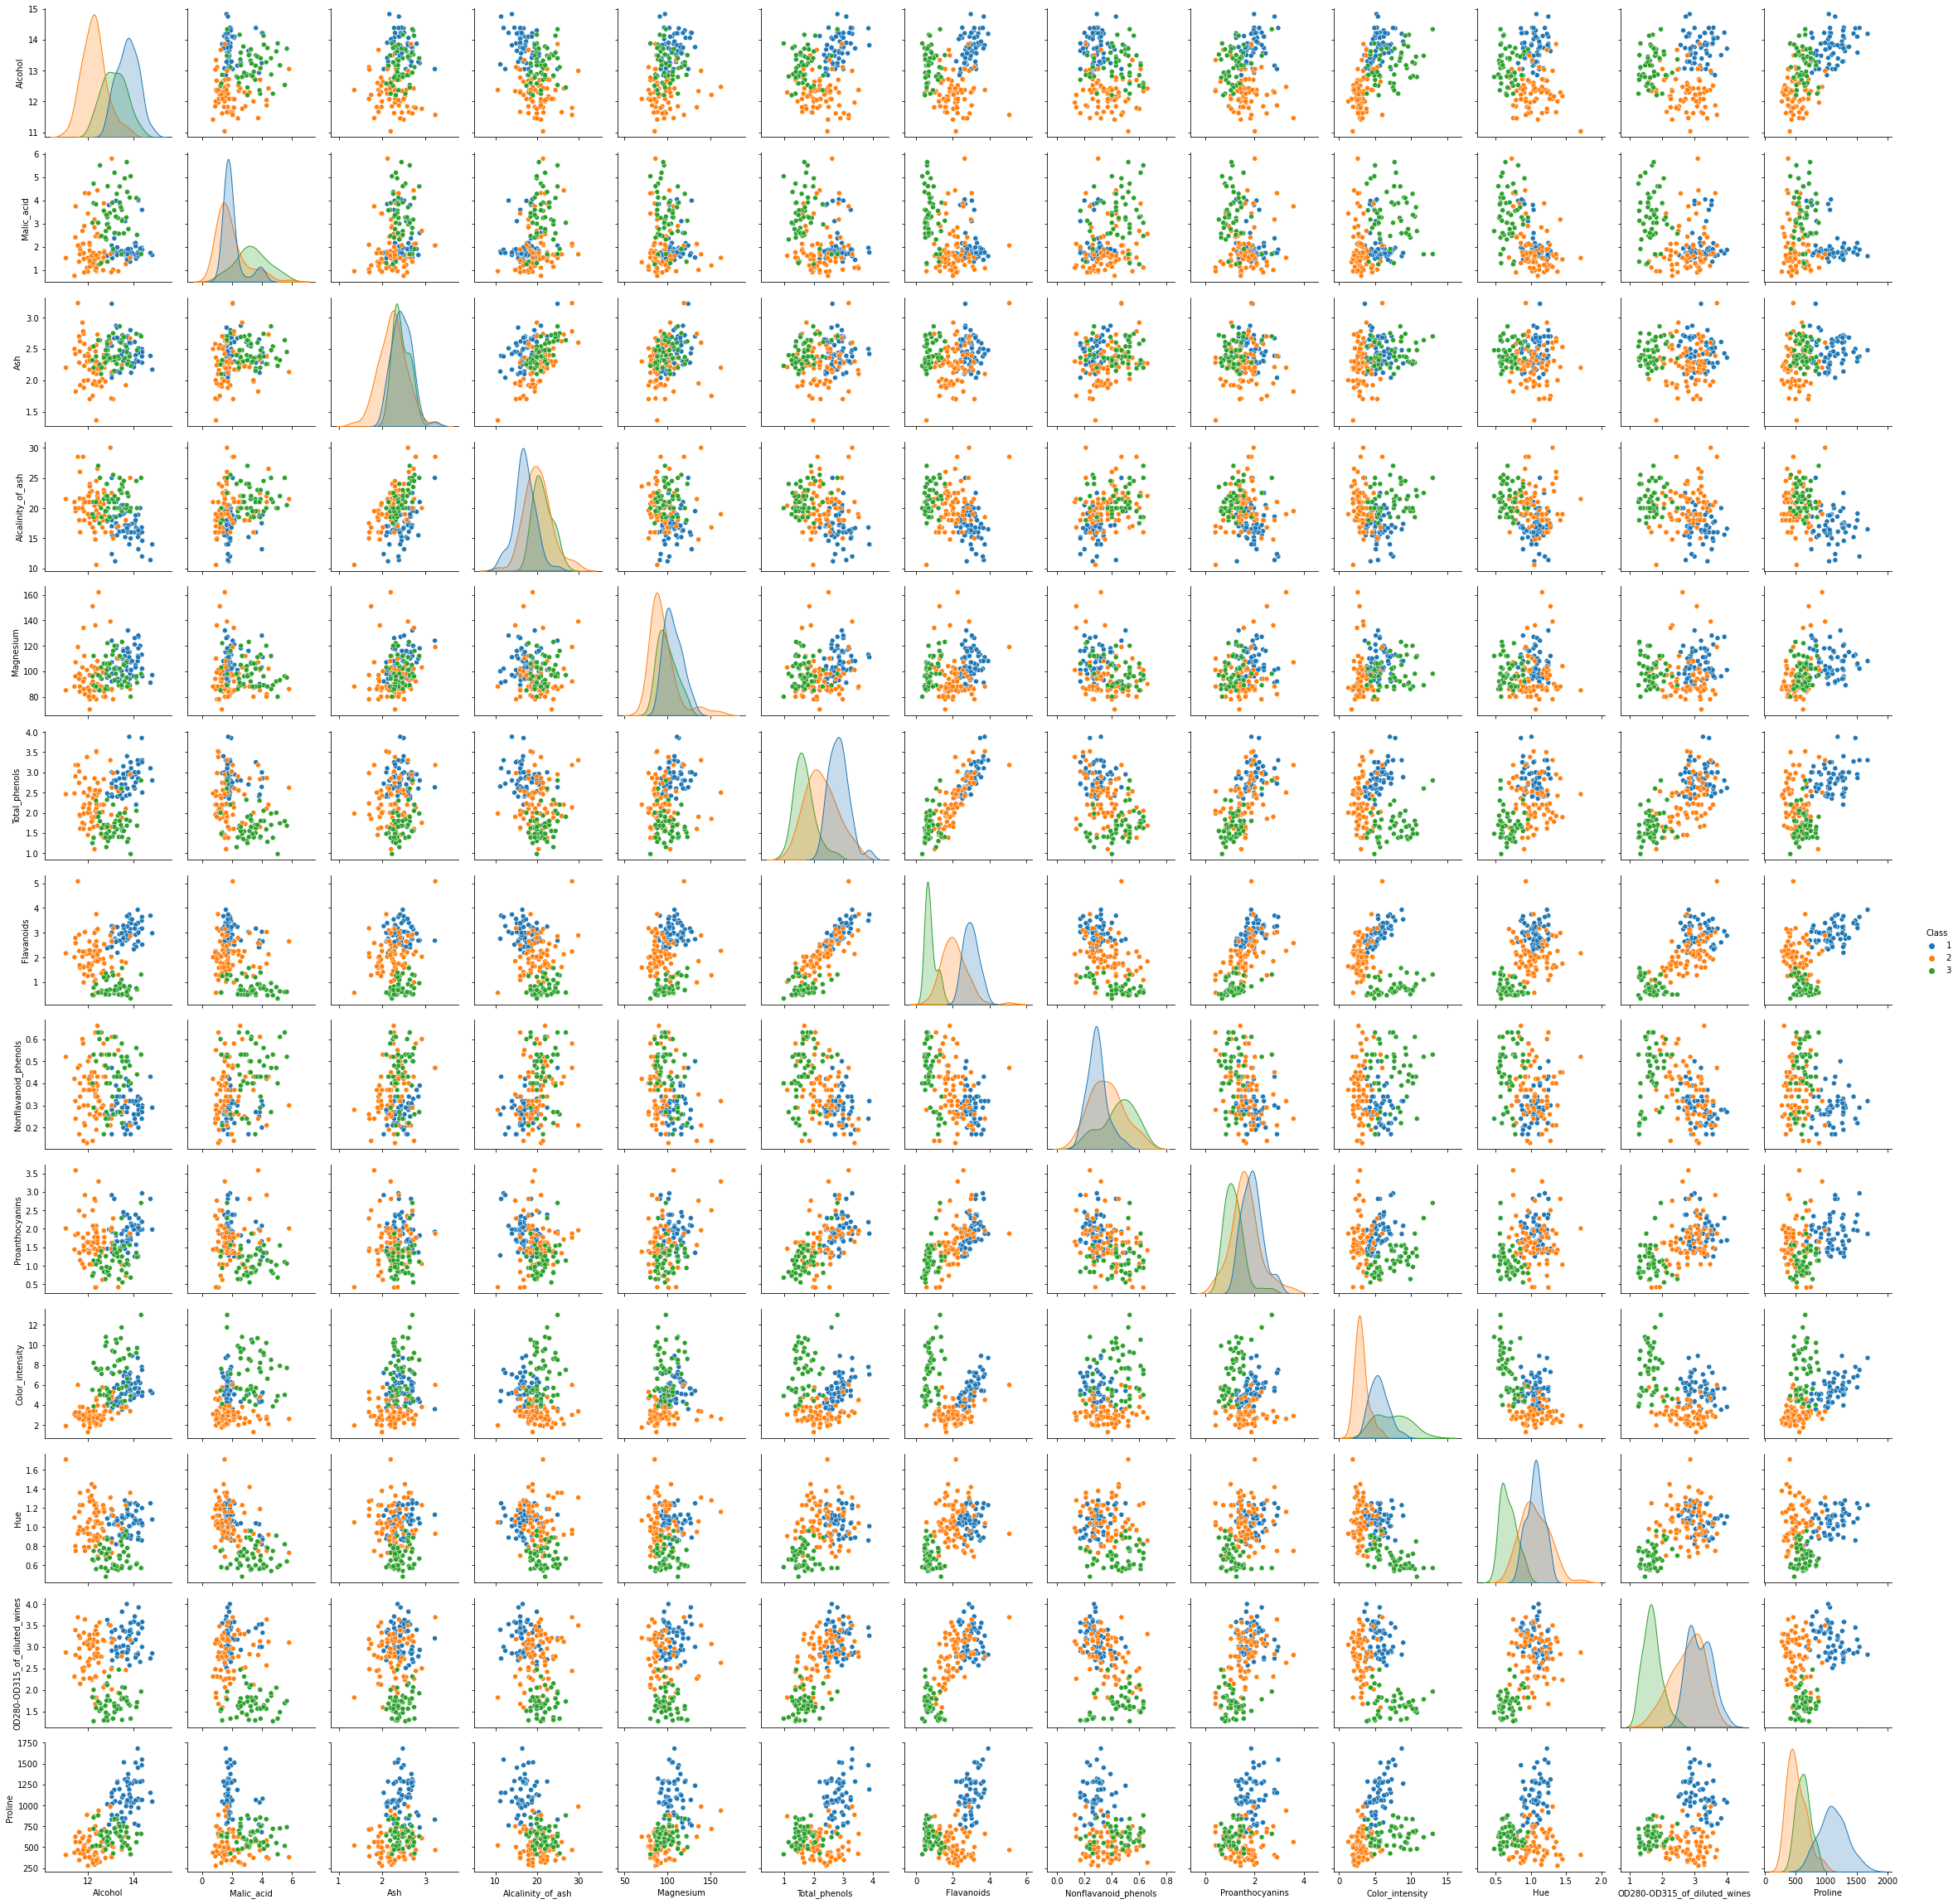

In [14]:
import seaborn as sns
sns.pairplot(wine_data, hue='Class')

### Summary
*   The dataset contains 174 samples and 14 features.
*   The 'Class' was converted from an integer type to a categorical type.
*   The data is balanced.

## Data Modeling

In [15]:
# Shuffle rows.
import random
from sklearn.utils import shuffle
random.seed(12)
wine_data = shuffle(wine_data, random_state = 12)
wine_data.reset_index(inplace = True, drop = True)
wine_data.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480
2,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
3,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
4,2,11.76,2.68,2.92,20.0,103,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607


In [16]:
# Store features.
X = wine_data.drop(['Class'], axis = 1).values
X.shape

(178, 13)

In [17]:
# One-Hot Encode the 'Class' column. 
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labels = array(wine_data['Class'].values)

label_encoder = LabelEncoder() 
integer_encoded = label_encoder.fit_transform(labels)

onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)

y.shape

(178, 3)

In [18]:
# Split the dataset into training (70%) and test sets (30%). 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 12)

In [19]:
# Import tensorflow.
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.7.0'

In [20]:
# Configure deep learning model.
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(13, activation = 'relu', input_shape = (13,)))
model.add(Dense(13, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.output_shape
model.summary()
model.get_config()
model.get_weights()

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer= tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(name = "categorical_accuracy")])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 3)                 42        
                                                                 
Total params: 406
Trainable params: 406
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train model.
h = model.fit(X_train, y_train, epochs = 400,
           batch_size = 16, validation_split = 0.30)

Epoch 1/400
7/7 [==============================] - 1s 35ms/step - loss: 121.9194 - categorical_accuracy: 0.3482 - val_loss: 72.3127 - val_categorical_accuracy: 0.4375
Epoch 2/400
7/7 [==============================] - 0s 5ms/step - loss: 106.9652 - categorical_accuracy: 0.3750 - val_loss: 62.3010 - val_categorical_accuracy: 0.4375
Epoch 3/400
7/7 [==============================] - 0s 8ms/step - loss: 92.8074 - categorical_accuracy: 0.3661 - val_loss: 53.1301 - val_categorical_accuracy: 0.4375
Epoch 4/400
7/7 [==============================] - 0s 5ms/step - loss: 78.6635 - categorical_accuracy: 0.3750 - val_loss: 44.3991 - val_categorical_accuracy: 0.4375
Epoch 5/400
7/7 [==============================] - 0s 5ms/step - loss: 64.5910 - categorical_accuracy: 0.3750 - val_loss: 36.0762 - val_categorical_accuracy: 0.4375
Epoch 6/400
7/7 [==============================] - 0s 8ms/step - loss: 51.3418 - categorical_accuracy: 0.3750 - val_loss: 28.0056 - val_categorical_accuracy: 0.4375
Epoch 7

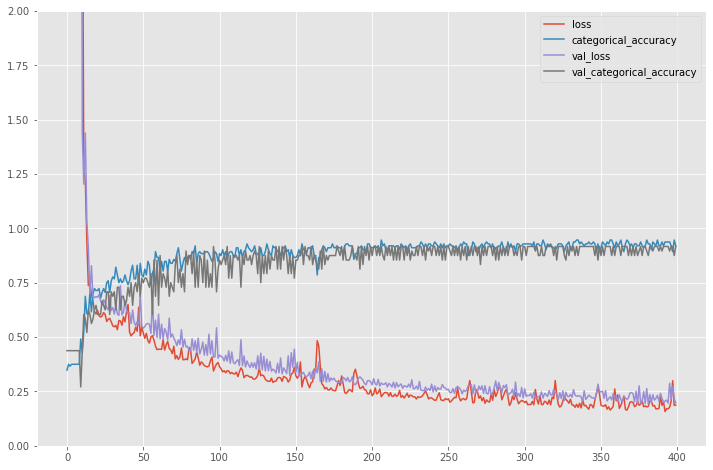

In [22]:
# Plot the the loss, validation loss, accuracy and validation accuracy.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

pd.DataFrame(h.history).plot(figsize=(12, 8), ls='-')
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()